In [3]:
# In[1]:


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np    

In [4]:
# In[2]:


tf.enable_eager_execution()
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [7]:
# In[3]:


#학습 데이터의 경로
TRAIN_DIR = './train/'
#테스트 데이터의 경로
TEST_DIR = './test/'
batch_size = 32

In [8]:
# In[4]:


#이미지의 가로 세로
IM_WIDTH = 224
IM_HEIGHT = 224

In [14]:
# In[5]:



from keras_preprocessing.image import ImageDataGenerator

In [15]:
# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
      rotation_range=180, # 회전 쵀대 180도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 좌우 반전
      vertical_flip=True, # 상하 반전
      )
 
# 검증에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator()
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IM_WIDTH, IM_HEIGHT),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(IM_WIDTH, IM_HEIGHT),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [21]:
train_generator

In [25]:
# In[6]:


class_num=len(train_generator.class_indices)
class_num

3

In [26]:
# In[7]:


custom_labels = list(train_generator.class_indices.keys())
custom_labels

['cured', 'decayed', 'healthy']

In [24]:
# In[9]:


from tensorflow import keras

#Resnet50 구조를 갖는 Model생성
conv_layers = keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, 
                                                    input_shape=(IM_WIDTH, IM_HEIGHT, 3))

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [27]:
# In[10]:


conv_layers.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [28]:
# In[11]:


model = keras.models.Sequential()
#Resnet50대입
model.add(conv_layers)
#결과를 1차원 배열로 생성 
model.add(keras.layers.Flatten())
#1024번의 선형회귀 실행
model.add(keras.layers.Dense(1024, activation='relu'))
#전체에서 임의의 50%만 학습
model.add(keras.layers.Dropout(0.5))
#결과 출력
model.add(keras.layers.Dense(class_num, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
# In[12]:


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              102761472 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 126,352,259
Trainable params: 126,299,139
Non-trainable params: 53,120
_________________________________________________________________


In [30]:
# In[13]:


#학습 설정
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [31]:
# In[ ]:


history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=test_generator,
      validation_steps=test_generator.samples/test_generator.batch_size,
      verbose=1)

Epoch 1/10
Instructions for updating:
Use tf.cast instead.
5/5 [==============================] - 257s 51s/step - loss: 5.1180 - acc: 0.3200 - val_loss: 4.1031 - val_acc: 0.4333
Epoch 2/10
5/5 [==============================] - 243s 49s/step - loss: 3.3575 - acc: 0.5733 - val_loss: 6.4821 - val_acc: 0.4333
Epoch 3/10
5/5 [==============================] - 248s 50s/step - loss: 2.9161 - acc: 0.6467 - val_loss: 5.1944 - val_acc: 0.5333
Epoch 4/10
5/5 [==============================] - 225s 45s/step - loss: 2.2278 - acc: 0.7533 - val_loss: 9.1848 - val_acc: 0.3667
Epoch 5/10
5/5 [==============================] - 222s 44s/step - loss: 1.8222 - acc: 0.7600 - val_loss: 7.6131 - val_acc: 0.4500
Epoch 6/10
5/5 [==============================] - 238s 48s/step - loss: 1.3160 - acc: 0.7867 - val_loss: 4.5772 - val_acc: 0.6333
Epoch 7/10
5/5 [==============================] - 231s 46s/step - loss: 0.8497 - acc: 0.8467 - val_loss: 4.9200 - val_acc: 0.6000
Epoch 8/10
5/5 [==========================

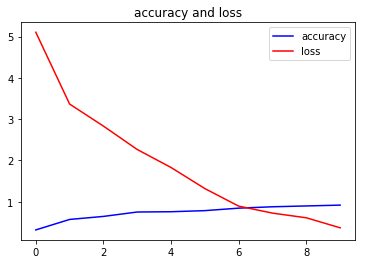

In [32]:
# In[ ]:


import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

In [36]:
# In[ ]:


from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

from IPython.display import display

files = [
    './test/healthy/1.jpg',
    './test/healthy/2.jpg',
    './test/decayed/101.jpg',
    './test/decayed/102.jpg',
    './test/cured/301.jpg',
    './test/cured/302.pg',
     ]

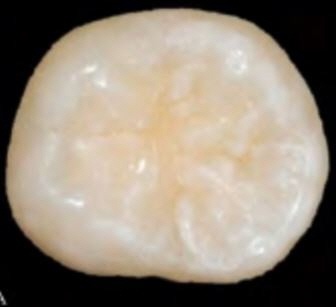

NameError: name 'resnet50' is not defined

In [37]:
# In[ ]:


#반복문을 실행
for file in files:
    #file경로의 이미지 파일을 읽음
    image = load_img(file)
    #이미지 파일 화면에 출력
    display(image)
    #이미지 파일의 크기를 224X224로 변형
    image_resize = load_img(file, target_size=(224, 224))
    #이미지 파일의 내용을 numpy배열로 변환해서 리턴(3차원 배열)
    image_arr_dm3 = img_to_array(image_resize)
    #배열 image를 4차원 배열로 변환
    image_arr_dm4 = image_arr_dm3.reshape((1, 224, 224, 3))
    #resnet이 처리가능하도록 배열 데이터 수정
    image_arr_dm4 = resnet50.preprocess_input(image_arr_dm4)
    yhat = model.predict(image_arr_dm4)
    

    # 최대 출력 인덱스를 구한다.
    idx=np.argmax(yhat[0])

    # 커스텀 레이블을 출력한다.
    print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))


# In[ ]: